##### 共享坐标轴
当你通过`pyplot.subplot()`、`pyplot.axes()`函数或者`Figure.add_subplot()`、`Figure.add_axes()`方法创建一个`Axes`时，你可以通过`sharex`关键字参数传入另一个`Axes`表示共享X轴；或者通过`sharey`关键字参数传入另一个`Axes`表示共享Y轴。

##### 创建多个`subplot`
<code>fig,axs=plt.subplots(2,2,sharex=True,sharey=True)
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]</code>

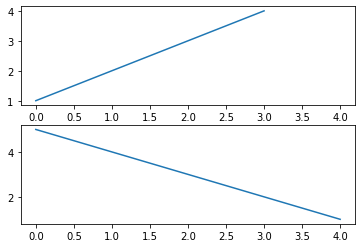

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot([1,2,3,4])
ax2 = fig.add_subplot(212,sharex=ax1)
ax2.plot([5,4,3,2,1])
plt.show()

##### 调整日期显示
当x轴为时间日期时，有可能间隔太密集导致显示都叠加在一起。此时可以用`matplotlib.figure.Figure.autofmt_xdate()`函数来自动调整X轴日期的显式。

你也可以调整X轴的显示格式。当X轴为时间时，其显示由`Axes.fmt_xdata`属性来提供。该属性是一个函数对象或者函数，接受一个日期参数，返回该日期的显示字符串。matplotlib已经提供了许多date formatter，你可以直接使用`ax.fmt_xdata=matplotlib.dates.DateFormatter('%Y-%m-%d')`

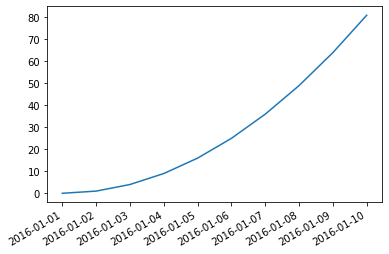

In [4]:
import datetime as dt
d = dt.date(2016,1,1)
ndates = [d+dt.timedelta(i) for i in range(10)]
n_ys = [i*i for i in range(10)]
fig, ax = plt.subplots(1)
ax.plot(ndates,n_ys)
fig.autofmt_xdate()
ax.fmt_xdata = mpl.dates.DateFormatter('%Y-%m-%d')
plt.show()

The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


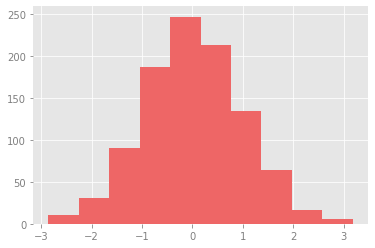

In [4]:
from matplotlib import cycler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.random.randn(1000)

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.hist(x);

##### Customizing Tick
We can fix this with the ``plt.MaxNLocator()``, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

In [ ]:
x=[1,2,3,4,5]
y = np.sin(np.array(x))
fig, ax = plt.subplots()
ax.plot(x,y)
ax.xaxis.set_major_locator(plt.FixedLocator(x))
'''If nbins is not None,
the array of possible positions will be subsampled to
keep the number of ticks <= nbins +1.
The subsampling will be done so as to include the smallest
absolute value; for example, if zero is included in the
array of possibilities, then it is guaranteed to be one of
the chosen ticks.'''
#value是locator的值，tick_number是value对应的yindex
def formatter(value,tick_number): 
    s = list('ABCDE')
    return '{},{}'.format(s[tick_number],value)
ax.xaxis.set_major_formatter(plt.FuncFormatter(formatter))
line = ax.lines[0]
line.set(color='r',alpha=0.5)
tick = ax.xaxis.get_major_ticks()[0]
tick.tick1line.set_visible(False)
tick.gridline.set_visible(True)
tick.label.set_color('r')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

##### 放置text box
当你在Axes中放置text box时，你最好将它放置在`axes coordinates`下，这样当你调整X轴或者Y轴时，它能够自动调整位置。
你也可以使用Text的`.bbox`属性来让这个Text始终放在某个`Patch`中。其中.bbox是个字典，它存放的是该Patch实例的属性。

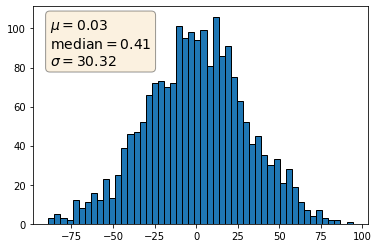

In [8]:
fig, ax = plt.subplots(1)
x = 30*np.random.randn(2000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$'%(mu,median,sigma)
ax.hist(x,50,edgecolor='k')
props = dict(boxstyle='round',facecolor='wheat',
            alpha=0.4)
ax.text(0.05,0.95,textstr,transform=ax.transAxes,
       fontsize=14,verticalalignment='top',bbox=props)
plt.show()

##### 平移坐标轴
`Axes.spines`是个字典，它存放了四个键，分别为： `Axes.spines['left]`,`Axes.spines['right]`,`Axes.spines['top]`,`Axes.spines['bottom]` 他们都是一个`matplotlib.spines.Spine`对象，该对象继承自`matplotlib.patches.Patch`对象，主要是设置图形边界的边框。
`Spine.set_color('none')`：不显示这条边线

`Spine.set_position((position))`：将边线移动到指定坐标，其中position是一个二元元组，指定了 (position type,amount)，position type可以是：

- `outward`：在绘图区域之外放置边线，离开绘图区域的距离由 amount指定
- `axes`：在 Axes coordinate内放置边线（从 0.0 到 1.0 ）
- `data`：在 data coordinate 内放置边线

Text(0.5, 1.0, 'move axis')

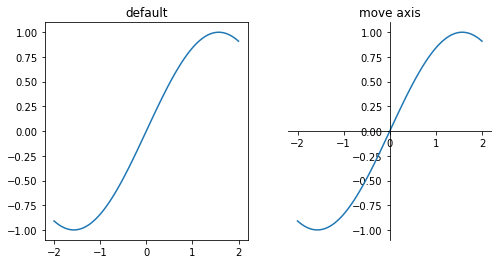

In [13]:
X = np.linspace(-2,2,100)
Y = np.sin(X)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X,Y)
ax1.set_title('default')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X,Y)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('data',0))
ax2.yaxis.set_ticks_position('left')
ax2.spines['left'].set_position(('data',0))
ax2.set_title('move axis')

In [ ]:
def adjust_spines(ax,spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward',10)) # outward by 10 points
        else:
            spine.set_color('none') # don't draw spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        ax.xaxis.set_ticks([])

##### 清楚X,Y坐标
<code> Axes.set_xticks(())
  Axes.set_yticks(())
  Axes.set_axis_off() </code>

In [ ]:
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

#####  直角坐标系、对数坐标系、极坐标系
通过`Axes.set_xscale(value,**kwargs)/Axes.set_yscale(value,**kwargs)`方法可以设置x轴/y轴是否对数坐标。其中value可以为:

- linear：线性
- log：对数。其中basex|basey关键字指定对数的基
- logit：以2为底的对数
- symlog：对数，其中basex|basey关键字指定对数的基

通过`Figure.add_axes((left,bottom,width,height), projection='polar')`

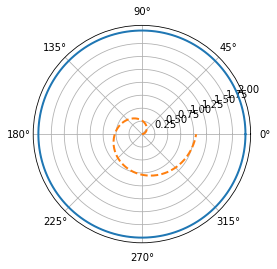

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')
theta = np.arange(0,2*np.pi,0.02)
ax.plot(theta,2*np.ones_like(theta),lw=2)
ax.plot(theta,theta/6,'--',lw=2)
plt.show()

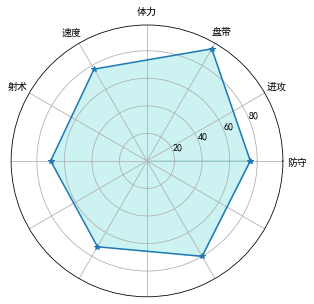

In [14]:
# 雷达图
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
def Radian(series):
    fig = plt.figure(figsize=(5,5))
    ax=fig.add_subplot(111,projection='polar')
    n = len(series)
    x = np.arange(0, 2*np.pi+np.pi/n, 2*np.pi/n)
    y=series.to_list()
    y.append(y[0])
    ax.plot(x,y,marker='*',)
    ax.fill_between(x,y,0,color='c',alpha=0.2)
    ax.set_xticks(np.arange(0,2*np.pi,np.pi/n))
    ax.set_xticklabels(series.index.to_list());
index = ['防守','进攻','盘带','体力','速度','射术']
ser = pd.Series(np.random.randint(60,100,6),index=index)
Radian(ser)  

##### 坐标变换
matplotlib中有四个坐标系：

- 用户级的`data`坐标系：坐标转换对象为`ax.transData`。它是用户级坐标系，由xlim和ylim控制
- `Axes`坐标系：坐标转换对象为`ax.transAxes`。
- Figure坐标系：坐标转换对象为`fig.transFigure`。
- display坐标系：它没有坐标转换对象。它显示的是display的像素坐标系

前面三个坐标系的坐标转换对象有方法执行坐标转换，这些方法接受输入并产生输出：输入为本坐标系内的坐标点，输出为display坐标系中的坐标。
在`Artist`的构造函数中传入`transform`关键字参数，就能够切换坐标系。如：`ax.text(0.05,0.95,label,"This is a Text",transform=ax.transAxes)`，将`Text`放置于`Axes`坐标系中的(0.05,0.95)位置处。

你可以调用`ax.transData`返回data坐标系的坐标转换对象。对该坐标转换对象调用`.transform(point)`方法会返回point在display坐标系下的坐标。其中point是点在data坐标系下的坐标(x,y)。你也可以给`.transform()`方法一次传入多个点的坐标，此时输出也是对应于display坐标系下的一系列坐标。

你可以对`ax.trandData`返回的坐标转换对象调用`.inverted()`方法。该方法返回的是一个坐标逆转换对象。对该坐标逆转换对象调用`.transform(point)`方法会返回point在data坐标系下的坐标。其中point是点在display坐标系下的坐标(x,y)。你也可以给`.transform()`方法一次传入多个点的坐标，此时输出也是对应于data坐标系下的一系列坐标。
<code> ax.set_xlim(0,10)
ax.set_ylim(-1,1)
ax.transData.transform([(5,0),(1,2)]
ax.transData.inverted((328,240))</code>

在`Axes`坐标系中，(0,0)位于Axes的左下角，(1,1)位于Axes的右上角，(0.5,0.5)位于Axes的中心。当然你可以引用位于这之外的点，如(-0.1,1.1)。
通常如果你需要在`Axes`中放置一些文字说明，那么一般都是采用Axes坐标系来定位。这样无论图形怎么缩放，这些Text都能位于正确的位置。

``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.

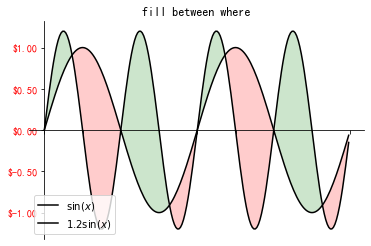

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2>y1, facecolor='green',alpha=0.2)
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='red',alpha=0.2)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.set_title('fill between where')
ax.legend(ax.lines,('$\sin(x)$','$1.2\sin(x)$'),loc='lower left')
ax.set_xticklabels([])

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_visible(True)
    tick.label2.set_visible(False)
    tick.label1.set_color('red')
ax.patch.set_facecolor('white')
plt.show()

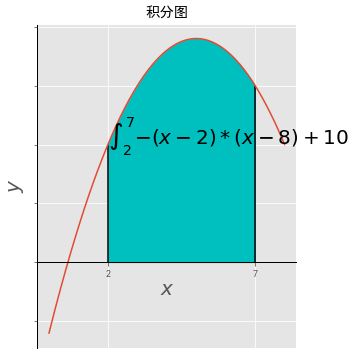

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy 
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
mpl.style.use('ggplot')
fig = plt.figure(figsize=(4,5))
ax = fig.add_axes([0.1,0.1,0.9,0.9])

def f(x):
    return -(x-2)*(x-8)+10
x=np.linspace(0,8,256)
y=f(x)
ax.plot(x,y)
ax.set_xlabel('$x$',fontdict={'fontsize':20})
ax.set_ylabel('$y$',fontdict={'fontsize':20})
ax.vlines(x=2,ymin=0,ymax=f(2))
ax.vlines(x=7, ymin=0, ymax=f(7))
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
xt= np.linspace(2,7,256)
ax.fill_between(xt,f(xt),0,color='c')
ax.text(2,10,'$\int_{2}^{7}{-(x-2)*(x-8)+10}$',size=20)
ax.set_xticks([2,7])
ax.set_xticklabels([2,7])
ax.set_yticklabels([]);
plt.title('积分图');

##### Path
`PATH`对象的创建通过`matplotlib.path.Path(verts,codes)`创建，其中：
- verts：PATH的顶点。这些顶点必须构成一个封闭曲线。其中每个顶点必须指定x坐标和y坐标。
- codes：指示如何使用这些PATH顶点。它与verts关系是一一对应的。有如下指令：
   - Path.STOP：结束path的标记
   - Path.MOVETO：画笔提起并移动到指定的顶点
   - Path.LINETO：画笔画直线，从current position到指定的顶点
   - Path.CURVE3:画笔画二阶贝塞尔曲线，从当前点到指定的结束点，其中还有一个参数是指定的控制点
   - Path.CURVE4：画笔画三阶贝塞尔曲线
   - Path.CLOSEPOLY：指定的point参数被忽略。该指令画一条线段，从当前点到起始点
   
可以通过`matplotlib.patches.PathPatch(path)`来构建一个`PathPatch`对象，然后通过`Axes.add_patch(patch)`向Axes添加`PathPatch`对象.这样就添加了Path到图表中。

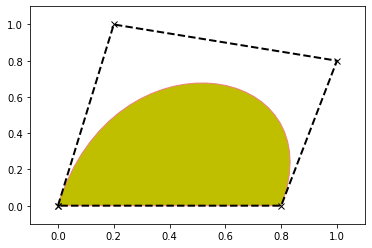

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.path import Path
import matplotlib.patches as pathes
verts=[(0,0),[0.2,1],(1,0.8),(0.8,0),(0,0)]
codes=[Path.MOVETO,Path.CURVE4,Path.CURVE4,
      Path.CURVE4,Path.CLOSEPOLY]
path = Path(verts,codes)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
patch = pathes.PathPatch(path, facecolor='y',edgecolor='#F08080')
ax.add_patch(patch)
xs,ys=zip(*verts)
ax.plot(xs,ys,'x--',lw=2,color='k')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
plt.show()

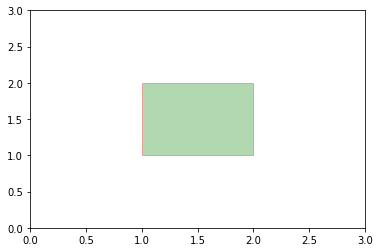

In [10]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
ax = plt.gca()
verts = np.array([[1,1],[1,2],[2,2],[2,1],[3,3]])
codes=np.array([1,2,2,2,79])
barpath = path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green', 
                          edgecolor='r', alpha=0.3)
ax.add_patch(patch)
ax.set_xlim(0, 3)
ax.set_ylim(0,3)
plt.show()

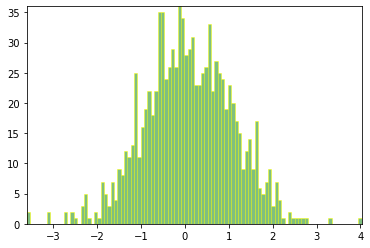

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

np.random.seed(19680801)

data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO  # 开始
codes[4::5] = path.Path.CLOSEPOLY  # 结束
# 柱状体左下角，左上角，右上角，右下角，
verts[0::5,0] = left
verts[0::5,1] = bottom
verts[1::5,0] = left
verts[1::5,1] = top
verts[2::5,0] = right
verts[2::5,1] = top
verts[3::5,0] = right
verts[3::5,1] = bottom
barpath = path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green', 
                          edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()

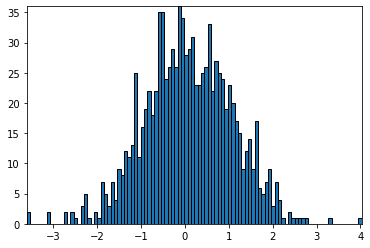

In [12]:
ax = plt.gca()
xy=np.array([[left,left,right,right],[bottom,top,top,bottom]]).T
barpath=path.Path.make_compound_path_from_polys(xy)
patch=patches.PathPatch(barpath)
ax.add_patch(patch)
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())
plt.show()

##### 布局
简单布局通过`Figure.add_subplot(*args,**kwargs)`方法来完成，它返回的是Axes实例。当然你也可以通过`plt.subplot(*args,**kwargs)`函数来完成，他返回的也是Axes实例，该函数只是一个便利函数。
最典型用法是`plt.subplot(nrows,ncols,plot_number)`。其中plot_number起始于1，最大值为nrows$\times$ncols。如果`nrows、ncols、plot_number`都是个位数，则你可以指定一个三位数来简化函数调用`plt.subplot(integer)`。
可以通过`plt.subplots()`函数一次性的创建多个`SubPlot`。

使用`plt.subplot2grid()`函数时，你只需要提供网格形状以及`SubPlot`位置即可，如： `ax=plt.subplot2grid((2,2),(0,0))`。其中`subplot2grid()`的位置坐标从0开始。`subplot2grid()`支持`SubPlot`横跨或者纵跨多个单元格。`colspan`关键字参数指定纵向的跨度；`rowspanguan`尖子参数指定横向的跨度。

直接创建`mpl.gridspec.GridSpec`然后通过它来创建`SubPlot`。如：
 <code>gs=mpl.gridspec.GridSpec(2,2)
  mpl.pyplot.subplot(gs[0,0])</code>
`GridSpec`对对象提供了类似array的索引方法，其索引的结果是一个`SubplotSpec`对象实例。如果你想创建横跨多个网格的`SubplotSpec`，那么你需要对`GridSpec`对象执行分片索引，如`pyplot.subplot(gs[0,:-1])`。

如果你使用`GridSpec`，那么你可以调整由GridSpec创建的SubplotSpec的layout parameter。如：
gs=gridspec.GridSpec(3,3)
  gs.update(left=0.05,right=0.48,wspace=0.05)
其中gs.update()的关键字参数有：
- left关键字参数：subplot左侧宽度
- bottom关键字参数：subplot右侧宽度
- wspace关键字参数：subplot之间的空白宽度
- hspace关键字参数：subplot之间的空白的高度

##### 颜色
`colors.cnames`是个字典，它给出了常用颜色的字符串和对应的`#FFFFFF`形式。
`colors.rgb2hex(rgb)`函数：给出了rgb元组到#FFFFFF形式。 而`hex2color(s)`给出了#FFFFFF到rgb形式。

`colors.ColorConverter`类是个颜色转换器类。它提供了下面方法用于转换颜色：

- .to_rgb(arg)：转换其他类型的颜色到标准的rgb三元组。其中arg可以为一个rgb/rgba序列，或者一个字符串，字符串格式为：
    - 一个代表颜色的字符，如'rgbcmykw'
    - 一个十六进制的颜色字符串，如'#0FFFFFF'
    - 一个标准的颜色的名字，如'red'
    - 一个代表浮点数的字符串，如'0.5'
- .to_rgba(arg, alpha=None)：转换其他类型的颜色到标准的rgba四元组
- to_rgba_array(c, alpha=None)：它返回一个ndarray，而不是一个元组

In [54]:
color=[('aliceblue', '#F0F8FF'), ('antiquewhite', '#FAEBD7'), 
    ('aqua', '#00FFFF'), ('aquamarine', '#7FFFD4'), ('azure', '#F0FFFF'), 
    ('beige', '#F5F5DC'), ('bisque', '#FFE4C4'), ('black', '#000000'), 
       ('blanchedalmond', '#FFEBCD'), ('blue', '#0000FF'), 
       ('blueviolet', '#8A2BE2'), ('brown', '#A52A2A'), 
       ('burlywood', '#DEB887'), ('cadetblue', '#5F9EA0'), 
       ('chartreuse', '#7FFF00'), ('chocolate', '#D2691E'), 
       ('coral', '#FF7F50'), ('cornflowerblue', '#6495ED'), 
    ('cornsilk', '#FFF8DC'), ('crimson', '#DC143C'), ('cyan', '#00FFFF'),
       ('darkblue', '#00008B'), ('darkcyan', '#008B8B'), 
       ('darkgoldenrod', '#B8860B'), ('darkgray', '#A9A9A9'), 
       ('darkgreen', '#006400'), ('darkgrey', '#A9A9A9'),
       ('darkkhaki', '#BDB76B'), ('darkmagenta', '#8B008B'), 
       ('darkolivegreen', '#556B2F'), ('darkorange', '#FF8C00'), 
       ('darkorchid', '#9932CC'), ('darkred', '#8B0000'),
       ('darksalmon', '#E9967A'), ('darkseagreen', '#8FBC8F'), 
       ('darkslateblue', '#483D8B'), ('darkslategray', '#2F4F4F'), 
       ('darkslategrey', '#2F4F4F'), ('darkturquoise', '#00CED1'), 
       ('darkviolet', '#9400D3'), ('deeppink', '#FF1493'), 
       ('deepskyblue', '#00BFFF'), ('dimgray', '#696969'), 
       ('dimgrey', '#696969'), ('dodgerblue', '#1E90FF'), 
       ('firebrick', '#B22222'), ('floralwhite', '#FFFAF0'), 
       ('forestgreen', '#228B22'), ('fuchsia', '#FF00FF'), 
       ('gainsboro', '#DCDCDC'), ('ghostwhite', '#F8F8FF'), 
('gold', '#FFD700'), ('goldenrod', '#DAA520'), ('gray', '#808080'), 
 ('green', '#008000'), ('greenyellow', '#ADFF2F'), ('grey', '#808080'), 
       ('honeydew', '#F0FFF0'), ('hotpink', '#FF69B4'), 
('indianred', '#CD5C5C'), ('indigo', '#4B0082'), ('ivory', '#FFFFF0'), 
    ('khaki', '#F0E68C'), ('lavender', '#E6E6FA'), 
       ('lavenderblush', '#FFF0F5'), ('lawngreen', '#7CFC00'), 
       ('lemonchiffon', '#FFFACD'), ('lightblue', '#ADD8E6'), 
       ('lightcoral', '#F08080'), ('lightcyan', '#E0FFFF'), 
     ('lightgoldenrodyellow', '#FAFAD2'), ('lightgray', '#D3D3D3'), 
       ('lightgreen', '#90EE90'), ('lightgrey', '#D3D3D3'), 
       ('lightpink', '#FFB6C1'), ('lightsalmon', '#FFA07A'), 
       ('lightseagreen', '#20B2AA'), ('lightskyblue', '#87CEFA'), 
       ('lightslategray', '#778899'), ('lightslategrey', '#778899'), 
       ('lightsteelblue', '#B0C4DE'), ('lightyellow', '#FFFFE0'), 
    ('lime', '#00FF00'), ('limegreen', '#32CD32'), ('linen', '#FAF0E6'), 
       ('magenta', '#FF00FF'), ('maroon', '#800000'), 
       ('mediumaquamarine', '#66CDAA'), ('mediumblue', '#0000CD'), 
       ('mediumorchid', '#BA55D3'), ('mediumpurple', '#9370DB'), 
       ('mediumseagreen', '#3CB371'), ('mediumslateblue', '#7B68EE'), 
       ('mediumspringgreen', '#00FA9A'), ('mediumturquoise', '#48D1CC'),
       ('mediumvioletred', '#C71585'), ('midnightblue', '#191970'), 
       ('mintcream', '#F5FFFA'), ('mistyrose', '#FFE4E1'), 
       ('moccasin', '#FFE4B5'), ('navajowhite', '#FFDEAD'), 
       ('navy', '#000080'), ('oldlace', '#FDF5E6'), ('olive', '#808000'), 
       ('olivedrab', '#6B8E23'), ('orange', '#FFA500'), 
       ('orangered', '#FF4500'), ('orchid', '#DA70D6'), 
       ('palegoldenrod', '#EEE8AA'), ('palegreen', '#98FB98'), 
       ('paleturquoise', '#AFEEEE'), ('palevioletred', '#DB7093'), 
       ('papayawhip', '#FFEFD5'), ('peachpuff', '#FFDAB9'), 
       ('peru', '#CD853F'), ('pink', '#FFC0CB'), ('plum', '#DDA0DD'), 
       ('powderblue', '#B0E0E6'), ('purple', '#800080'), 
       ('rebeccapurple', '#663399'), ('red', '#FF0000'), 
       ('rosybrown', '#BC8F8F'), ('royalblue', '#4169E1'), 
       ('saddlebrown', '#8B4513'), ('salmon', '#FA8072'), 
    ('sandybrown', '#F4A460'), ('seagreen', '#2E8B57'), 
('seashell', '#FFF5EE'), ('sienna', '#A0522D'), ('silver', '#C0C0C0'),
     ('skyblue', '#87CEEB'), ('slateblue', '#6A5ACD'), 
('slategray', '#708090'), ('slategrey', '#708090'), ('snow', '#FFFAFA'),
('springgreen', '#00FF7F'), ('steelblue', '#4682B4'), ('tan', '#D2B48C'),
('teal', '#008080'), ('thistle', '#D8BFD8'), ('tomato', '#FF6347'), 
('turquoise', '#40E0D0'), ('violet', '#EE82EE'), ('wheat', '#F5DEB3'),
('white', '#FFFFFF'), ('whitesmoke', '#F5F5F5'), 
('yellow', '#FFFF00'), ('yellowgreen', '#9ACD32')]

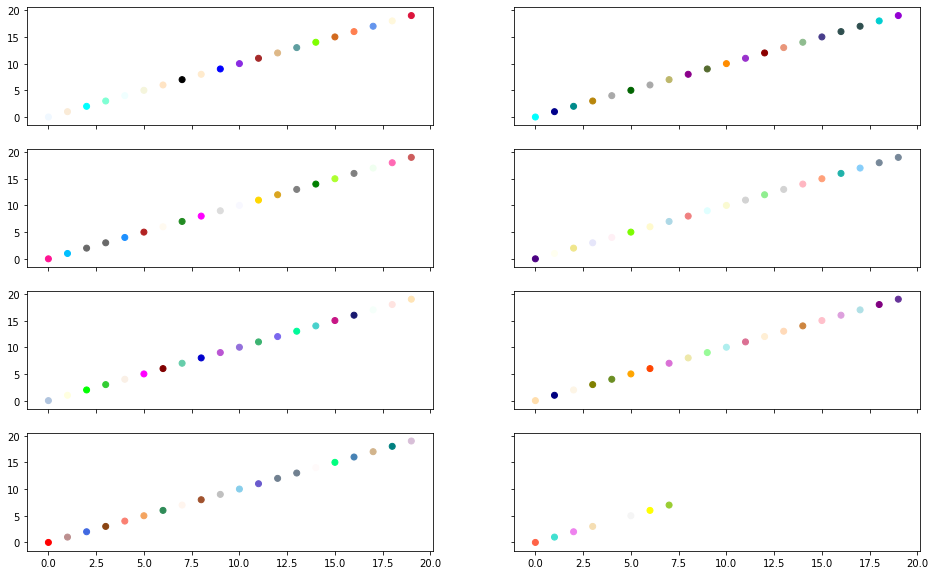

In [66]:
fig,axs = plt.subplots(4,2,sharex=True,sharey=True,figsize=(16,10))
for i,ax in enumerate(axs.ravel()):
    colors=color[20*i:20*(i+1)]
    x = range(len(colors))
    ax.scatter(x,x,c=list(map(getitem,colors,[0]*len(colors))))
plt.show()

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.

The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

All the available colormaps are in the ``plt.cm`` namespace;

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., ``binary`` or ``viridis``).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., ``RdBu`` or ``PuOr``).
- *Qualitative colormaps*: these mix colors with no particular sequence (e.g., ``rainbow`` or ``jet``).

the simplest colorbar can be created with the plt.colorbar function:

The colorbar itself is simply an instance of plt.Axes, so all of the axes and tick formatting tricks we've learned are applicable. The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the `extend` property. This might come in handy, 

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins

In [2]:
 colormap = {'Perceptually Uniform Sequential':['viridis', 
                    'inferno', 'plasma', 'magma'],
  'Sequential':['Blues', 'BuGn', 'BuPu','GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
  'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu','Reds', 'YlGn', 'YlGnBu', 
  'YlOrBr', 'YlOrRd'],
  'Sequential2':['afmhot', 'autumn', 'bone', 'cool','copper', 'gist_heat', 
                 'gray', 
  'hot','pink', 'spring', 'summer', 'winter'],
  'Diverging':['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
  'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral','seismic'],
  'Qualitative':['Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2',
  'Set1', 'Set2', 'Set3'],
  'Miscellaneous':['gist_earth', 'terrain', 'ocean', 'gist_stern','brg',
  'CMRmap', 'cubehelix','gnuplot', 'gnuplot2',   
  'gist_ncar','nipy_spectral', 'jet', 'rainbow',
  'gist_rainbow', 'hsv', 'flag', 'prism']}